# Natural Language Processing

### List 3

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from src.generate_dice_rolls import DiceRollsGenerator
from src.dice_predictors import HeuristicPredictor
from sklearn.metrics import accuracy_score

## Generate rolls

In [2]:
dice_roll_gen = DiceRollsGenerator()

In [3]:
fair_distr = (1/6,) * 6
cheat_distr = (1/10,)*5 + (1/2,)
p_fair_to_cheat = 0.04
p_cheat_to_fair = 0.05
n_rolls = 10000

In [4]:
rolls, dices = dice_roll_gen.generate_rolls(fair_distr, cheat_distr,
                                            p_fair_to_cheat, p_cheat_to_fair,
                                            n_rolls)

In [5]:
# Show some rolls and dices
print(rolls[:10])
print(dices[:10])

[2 3 4 1 3 5 2 1 3 4]
['u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'u']


### Show fair and cheat rolls on the bar plot

In [6]:
def bar_plot_rolls_with_dices(rolls: np.array, dices: np.array) -> plt.bar:
    fair_rolls = np.argwhere(dices == 'u').ravel()
    cheat_rolls = np.argwhere(dices == 'n').ravel()

    plt.figure(figsize=(20, 5))
    plt.bar(fair_rolls, rolls[fair_rolls], color='g')
    plt.bar(cheat_rolls, rolls[cheat_rolls], color='r')
    plt.xlabel('rolls', size=20)
    plt.ylabel('values', size=20)

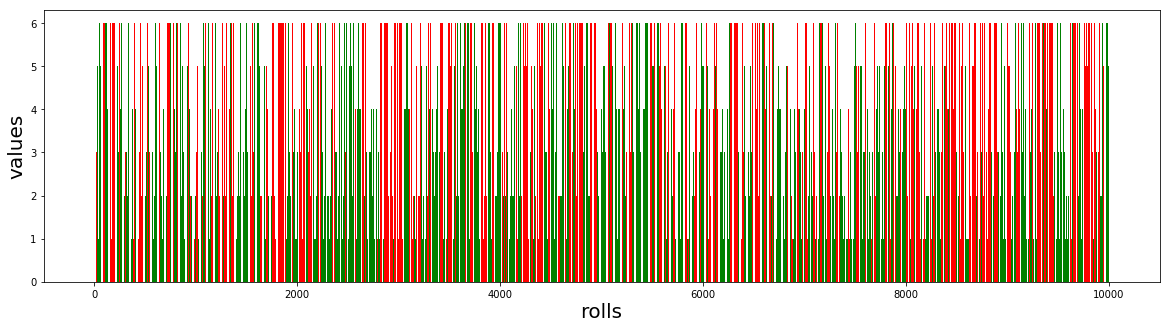

In [7]:
bar_plot_rolls_with_dices(rolls, dices)

## Make predictions of the dices — values are observable states, dices are hidden states

### Heuristic predictions based on the 6 density

In [8]:
heuristic_predictor = HeuristicPredictor()

In [18]:
for ratio in np.linspace(1/6, 5/6, 10):
    
    # Compute the predictions
    dices_heur = heuristic_predictor.predict(rolls, p_cheat_to_fair,
                                             min_six_subset_ratio=ratio)
    
    # Print the score with the coresponding ratio
    print(accuracy_score(dices, dices_heur), ratio)

0.5598440155984401 0.16666666666666666
0.6114388561143885 0.24074074074074076
0.6597340265973403 0.3148148148148148
0.7117288271172882 0.38888888888888895
0.7268273172682732 0.462962962962963
0.7597240275972402 0.5370370370370371
0.7483251674832517 0.6111111111111112
0.7264273572642735 0.6851851851851852
0.7106289371062894 0.7592592592592593
0.7007299270072993 0.8333333333333334


### Hidden Markov Model predictions